**Importando arquivo .CSV para o Grafo**

['B', 'C', 'D', 'G', 'M', 'R', 'S', 'V']
[[0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [1 6]
 [2 3]
 [4 7]
 [5 6]
 [5 7]]
[734.0, 887.0, 116.0, 442.0, 583.0, 987.0, 209.0, 408.0, 432.0, 517.0]


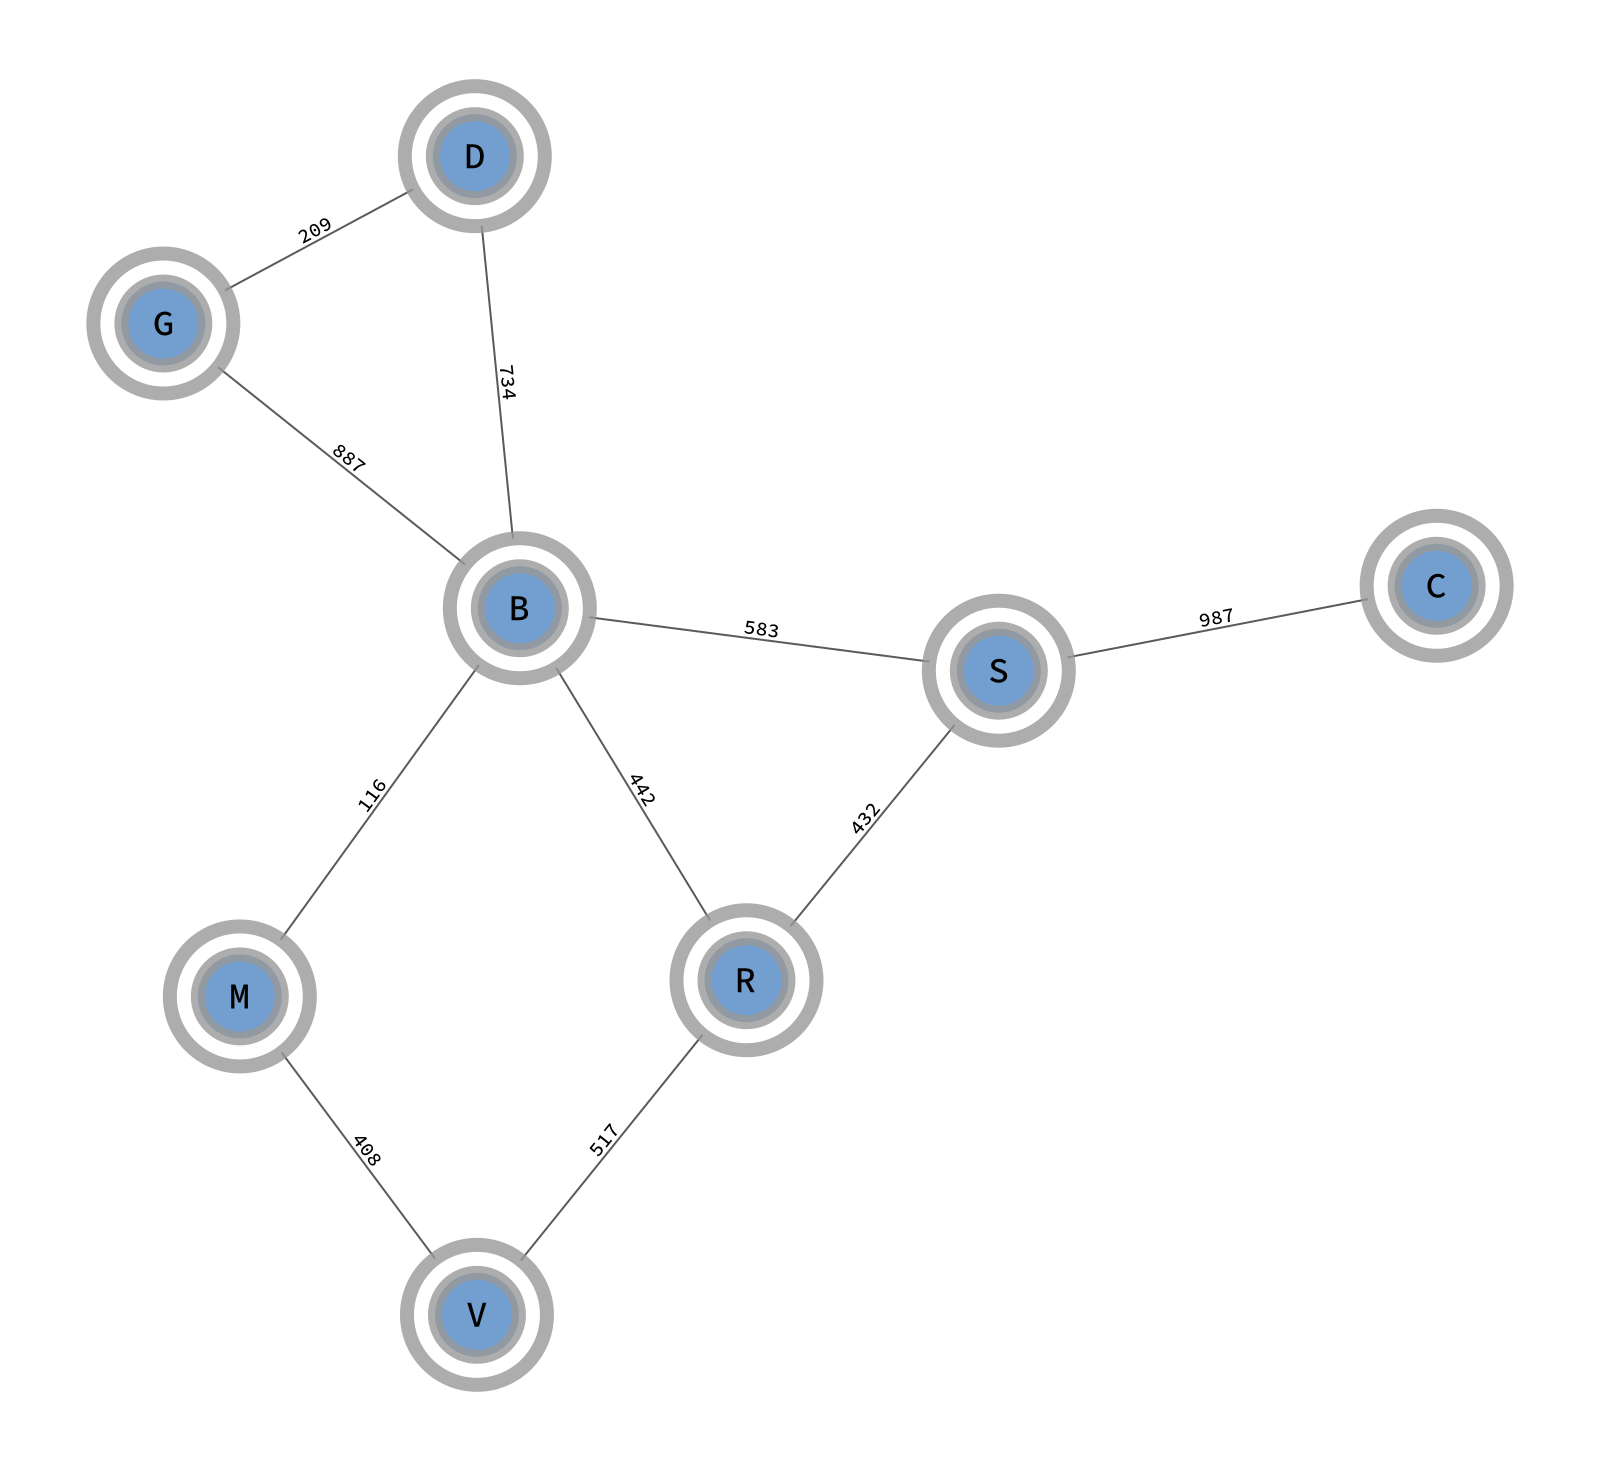

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f25e8485730, at 0x7f25e8491190>

In [51]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                                   # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
e_action = g.new_edge_property("string")          # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string
e_dist   = g.new_edge_property("float")          # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string

#Criação dos vértices no grafo à partir do arquivo .cvs de vértices
f_network = open("vertices.csv", 'r')
reader_network = csv.reader(f_network, delimiter=";")
for vertice in reader_network:
     v = g.add_vertex()
     v_name[v] = str(vertice[1])
f_network.close()
# Lista de vértices criados
print(list(v_name))

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r')
reader_network = csv.reader(f_network, delimiter=";")
for edge in reader_network:
     e = g.add_edge(int(edge[0]), int(edge[1]))
     e_dist[e] = float(edge[2])        
        
f_network.close()
# Lista de arestas criadas
print(g.get_edges())
# Lista de Pesos dos vértices criados
print(list(e_dist))

#Desenhando o grafo
gt.graph_draw(g, 
               vertex_text= v_name,
               edge_text= e_dist,
               edge_pen_width = 1,              
               vertex_font_size=18,
               edge_font_size = 10,
               vertex_shape="double_circle",
               vertex_fill_color="#729fcf",
               output_size=(800, 600))
               #output="two-nodes.png")
            

**Busca de Custo Uniforme - Ordem de Expansão dos Nodos**

['B', 'C', 'D', 'G', 'M', 'R', 'S', 'V']
[734.0, 887.0, 116.0, 442.0, 583.0, 987.0, 209.0, 408.0, 432.0, 517.0]
V -> M
V -> R
M -> B
R -> S
B -> D
B -> G
S -> C


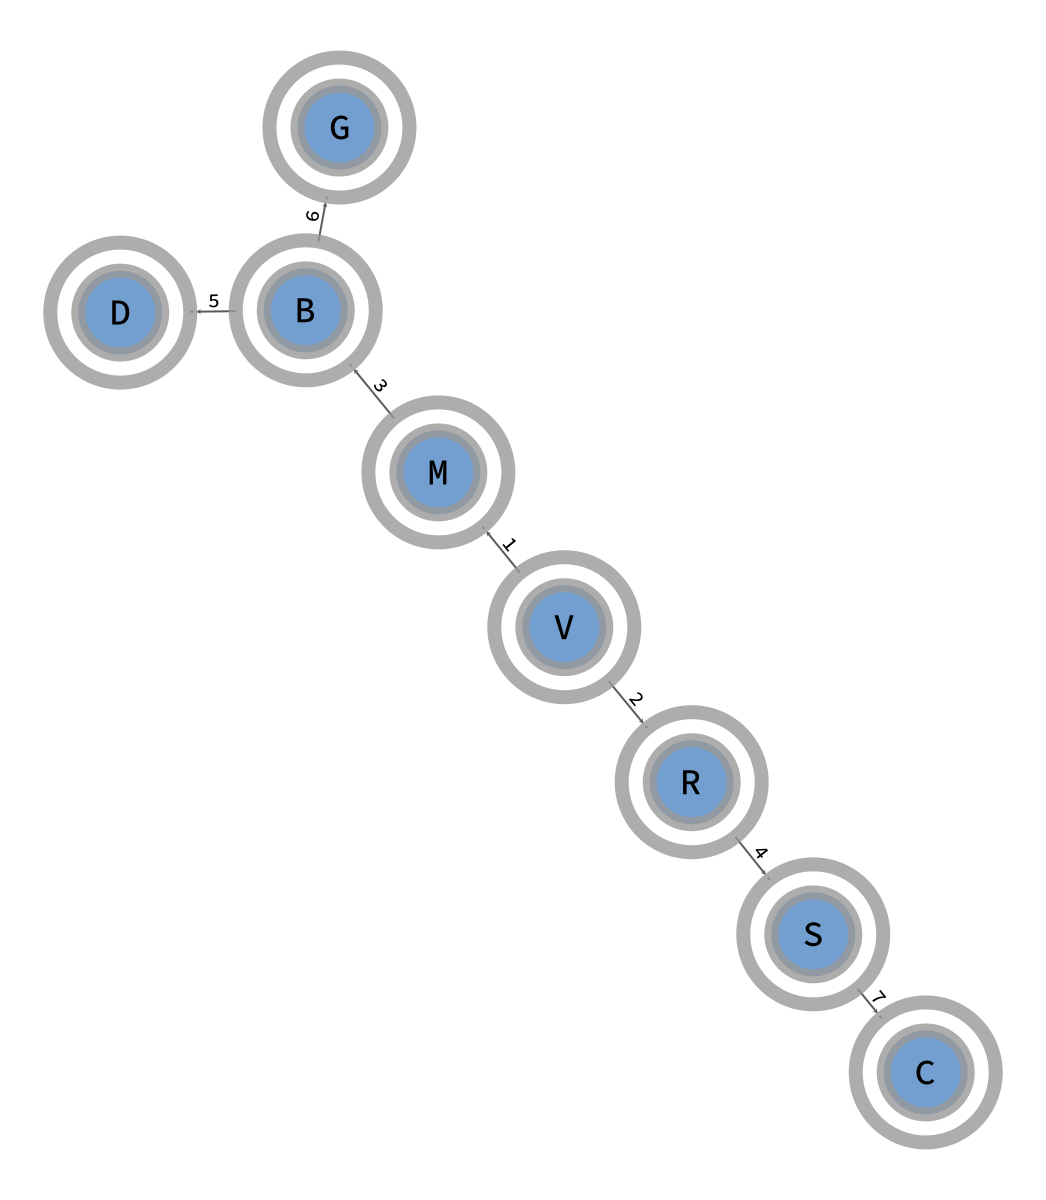

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f25e84853a0, at 0x7f25b617f790>

In [58]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_buni = gt.Graph()                                    # criação do objeto para busca em Profundidade
v_name = g_buni.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_buni.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int
e_action = g_buni.new_edge_property("string")      # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string

#Criação dos vértices no grafo à partir do arquivo .cvs de vértices
f_network = open("vertices.csv", 'r')
reader_network = csv.reader(f_network, delimiter=";")
for vertice in reader_network:
     v = g_buni.add_vertex()
     v_name[v] = str(vertice[1])
f_network.close()

# Lista de vértices criados
print(list(v_name))
# Lista de Pesos dos vértices criados
print(list(e_dist))

#Busca de Custo Uniforme (buni) e geração das arestas
raiz = 'V'
index_raiz = list(v_name).index(raiz)
ord = 1

for edge in gt.dijkstra_iterator(g, e_dist, g.vertex(index_raiz)):
    print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
    e = g_buni.add_edge(int(edge.source()), int(edge.target()))
    e_ord[e] = ord
    e_action[e] = '(' + str(ord) + ') '
    ord += 1
    
#Desenhando o grafo
gt.graph_draw(g_buni, 
              #vertex_size = v_size,
              vertex_text= v_name,
              edge_text= e_ord,
              vertex_font_size=18,
              edge_font_size = 10,
              edge_pen_width = 1,              
              vertex_shape="double_circle",
              vertex_fill_color="#729fcf",
              #output_size=(size, size*0.8))
              output_size=(800, 600))
              #output="two-nodes.png") 
  


**Busca do Custo Uniforme - Busca e Apresentação do Caminho**

In [69]:
class VisitorExample(gt.DijkstraVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord): 
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print("   ",self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def examine_edge(self, e):                                                  # Invocado em cada aresta de cada vértice depois de descoberto.
        print("    Aresta (%s, %s) em análise..." % \
              (v_name[e.source()], v_name[e.target()]))

    def edge_relaxed(self, e):                                                  #Após o exame do vértices, este método é invocado. 
        self.pred[e.target()] = int(e.source())                                 
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_bfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        self.e_count += 1
        self.e_ord[e] = self.e_count 
        self.e_action[e] = "(" + self.e_ord[e] + ") " + str(e_dist[g.edge(int(e.source()), int(e.target()))])
        print("    Após análise, aresta (%s, %s) mantida." % \
            (v_name[e.source()], v_name[e.target()]))
        
    def finish_vertex(self, u):
        print("    > Todos os vértices adjacentes à", self.name[u], "foram descobertos!\n") 

------------------------------------------------
> Busca de Custo Uniforme - Caminhamento pelos Estados
------------------------------------------------

--> V foi encontrado e entrou na FILA
    V saiu da FILA e está sendo analisado (expandido)...
    Aresta (V, M) em análise...
    Após análise, aresta (V, M) mantida.
--> M foi encontrado e entrou na FILA
    Aresta (V, R) em análise...
    Após análise, aresta (V, R) mantida.
--> R foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à V foram descobertos!

    M saiu da FILA e está sendo analisado (expandido)...
    Aresta (M, V) em análise...
    Aresta (M, B) em análise...
    Após análise, aresta (M, B) mantida.
--> B foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à M foram descobertos!

    R saiu da FILA e está sendo analisado (expandido)...
    Aresta (R, S) em análise...
    Após análise, aresta (R, S) mantida.
--> S foi encontrado e entrou na FILA
    Aresta (R, V) em análise...
    Aresta 

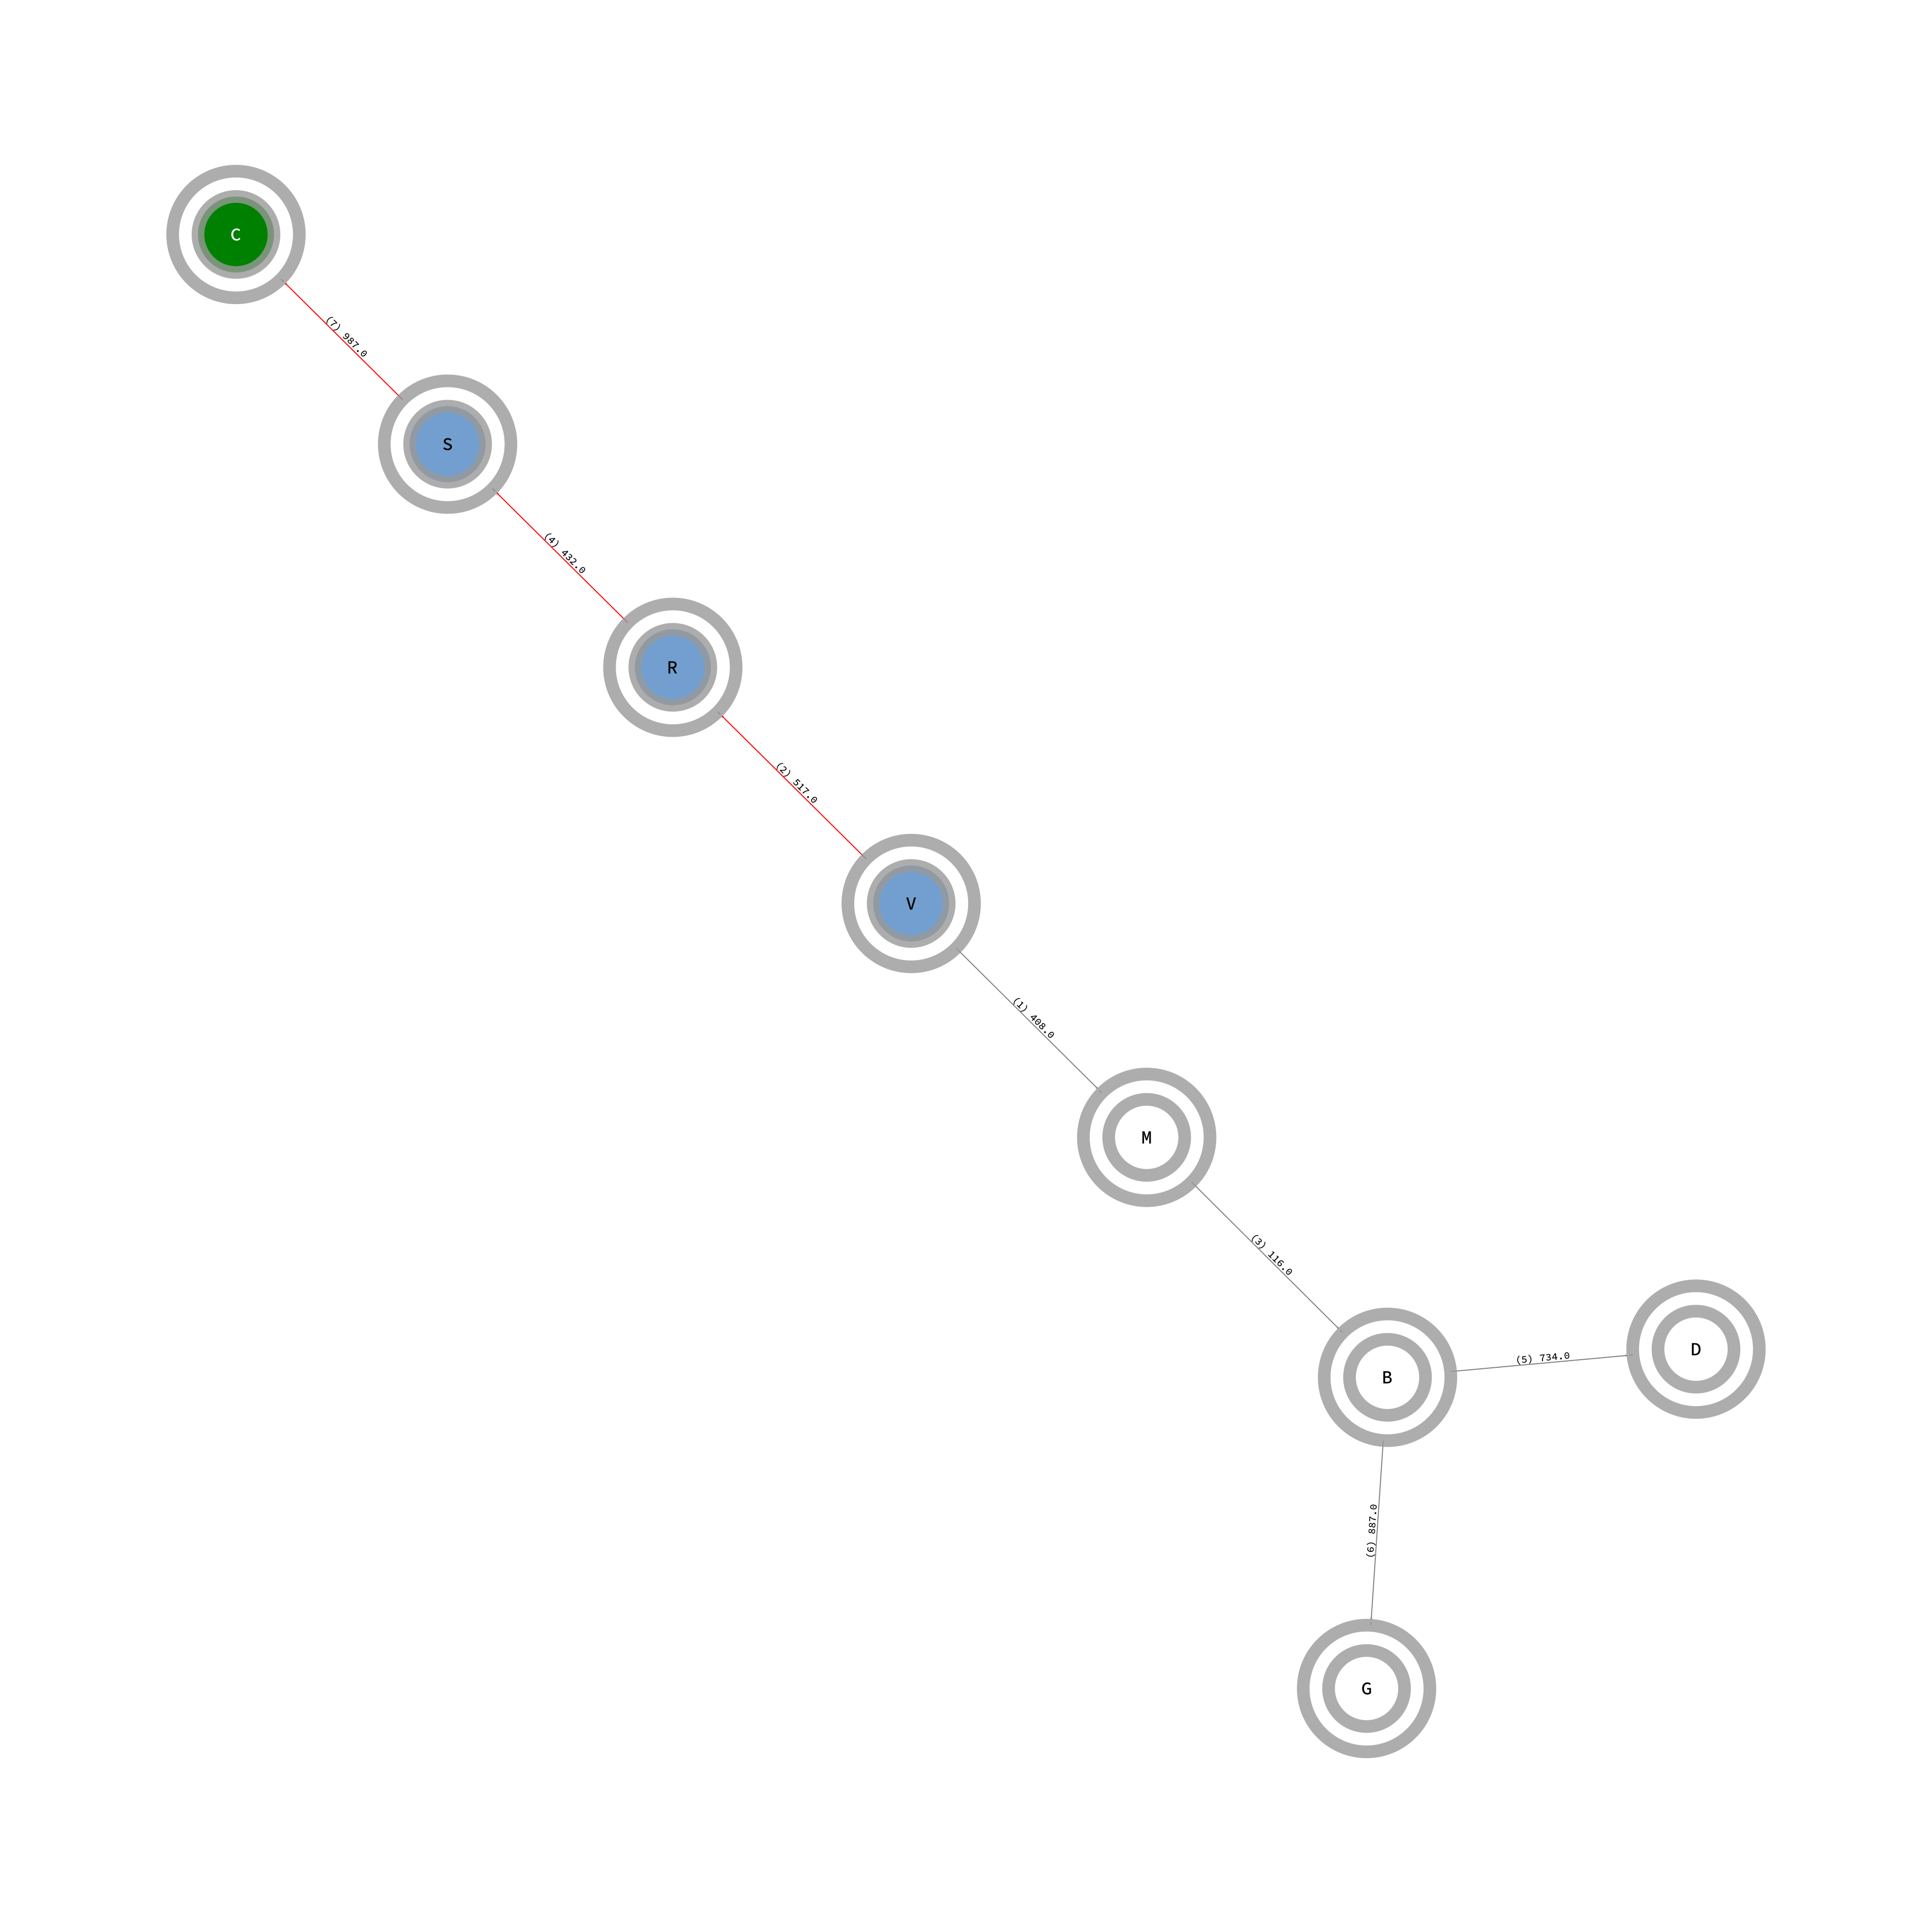

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f25b61ce370, at 0x7f25e84cd490>

In [74]:
#Busca de Custo Uniforme e geração das arestas
g_bfs = gt.Graph()                                      # criação do objeto para busca de Custo Uniforme
bfsv_name       = g_bfs.new_vertex_property("string")      # referenciação da lista v_name_bfs com uma nova propriedade do vértice para o nome - tipo string 
bfsv_time       = g_bfs.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
bfsv_name_time  = g_bfs.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
bfsv_color      = g_bfs.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
bfsv_dist       = g_bfs.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
bfsv_pred       = g_bfs.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
bfse_color      = g_bfs.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
bfse_action     = g_bfs.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_ord        = g_bfs.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_weight_bfs = g_bfs.new_edge_property("float")       # referenciação da lista e_weight com uma nova propriedade criada para a função g(n) - tipo float


print("------------------------------------------------")
print("> Busca de Custo Uniforme - Caminhamento pelos Estados")
print("------------------------------------------------\n")
raiz = 'V'
alvo = 'C'
index_raiz = list(v_name).index(raiz)

gt.dijkstra_search(g, e_dist, g.vertex(index_raiz), VisitorExample(bfsv_name, bfsv_time, bfsv_name_time, bfsv_color, bfsv_dist, bfsv_pred, bfse_color, bfse_action, bfse_ord))
print("\n> Informações relevantes:")
print("-------------------------\n")
print("Espaço de Estados......:", list(bfsv_name))
print("Ordem de Expansão......:", list(bfsv_time))
print("Estados e Ordem de Exp.:", list(bfsv_name_time))
print("Cores Vértices.........:", list(bfsv_color))
print("Distância da raiz......:", list(bfsv_dist))
print("Precedessores..........:", list(bfsv_pred))
print("Cores Arestas..........:", list(bfse_color))
print("Ações das Arestas......:", list(bfse_action))
print("Arestas e Ordem de Exp.:", list(bfse_ord))

print("\n> Procura de um Estado e Caminho:")
print("---------------------------------\n")

index_alvo = list(bfsv_name).index(alvo)                     # Localizando o índice do Estado a ser encontrado
bfsv_color[index_raiz] = "#729fcf"
bfsv_color[index_alvo] = "green"
path = []                                                    # array do caminho
path.insert(0,bfsv_name[index_alvo])                         # inserções sendo realizadas no início

while index_alvo != index_raiz:
  e = g_bfs.edge(bfsv_pred[index_alvo], index_alvo)
  bfse_color[e] = "red"
  index_alvo = bfsv_pred[index_alvo]
  path.insert(0,bfsv_name[index_alvo])
  bfsv_color[index_alvo] = "#729fcf"
  
bfsv_color[index_raiz] = "#729fcf"; print("Cores Vértices.........:", list(bfsv_color))

print("Caminho encontrado.....:",path)                   # mostrando o caminho encontrado da raiz ao alvo

#Desenhando o grafo
gt.graph_draw(g_bfs, 
               bg_color = "white",
               vertex_text= bfsv_name,
               edge_text= bfse_action,#bfse_ord, 
               edge_color= bfse_color,
               edge_pen_width = 1,              
               vertex_fill_color=bfsv_color,              
               vertex_font_size=18,
               edge_font_size = 10,
               vertex_shape="double_circle",
               output_size=(1900, 800))              
               #output="2021.1 - IA - Árvore de Busca em Custo Uniforme - Busca e Apresentação do Caminho.png")       
    
    